<a href="https://colab.research.google.com/github/jaedeokhan/20_1_AI_Introduce/blob/master/0326THU_IntroDL_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install keras

<strong>MNIST 데이터셋</strong> 불러오기

In [0]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


<strong>MNIST 데이터셋</strong> 살펴보기

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
len(test_images)

10000

In [0]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

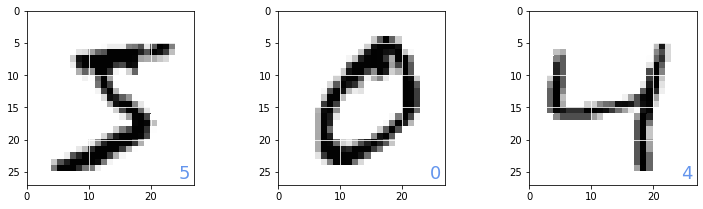

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1, 3, id + 1)
    img = train_images[id, :, :]
    plt.pcolor(255 - img)
    plt.text(24.5, 26, "%d" % train_labels[id],
             color='cornflowerblue', fontsize=18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.grid('on', color='white')
plt.show()

<strong>이미지 데이터</strong> 준비하기

In [0]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

<strong>학습 레이블 준비하기</strong> 준비하기

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

<strong>2층 피드 포워드 네트워크 모델</strong> 설계하기


In [0]:
from keras import models
from keras import layers
num_classes = 10

In [0]:
# 난수를 고정을 해준다.
np.random.seed(1)
network = models.Sequential()

# 첫 번째 층 : Dense, 512 는 뉴런의 갯수, sigmoid = 0~1사이를 출력
network.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))

# num_classes = 10 , softmax : class의 확률 값으로 나온다.
network.add(layers.Dense(num_classes, activation='softmax'))

<strong>모델 컴파일</strong> 수행하기
  1. 손실함수 설정
  2. 옵티마이저(optimizer) 설정
  3. 훈련과 테스트 과정을 모니터링할 지표 설정하기

In [0]:
# optimizer = adam, momentom , loss = input, output을 최소화, 특정 값은 accuarcy 를 보겠다.
network.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

<strong>fit 메서드</strong>를 호출하여 모델 학습하기

In [0]:
import time

startTime = time.time()
# epochs = 횟수, batch_size = 128개로 쪼개서 한다. , validation_data = 설정
history = network.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=1, validation_data=(test_images, test_labels))
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 10s 171us/step - loss: 0.4239 - acc: 0.8837 - val_loss: 0.2741 - val_acc: 0.9186
Epoch 2/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.2352 - acc: 0.9312 - val_loss: 0.2053 - val_acc: 0.9357
Epoch 3/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.1787 - acc: 0.9481 - val_loss: 0.1641 - val_acc: 0.9493
Epoch 4/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.1399 - acc: 0.9590 - val_loss: 0.1320 - val_acc: 0.9601
Epoch 5/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.1126 - acc: 0.9672 - val_loss: 0.1103 - val_acc: 0.9663
Epoch 6/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0931 - acc: 0.9727 - val_loss: 0.1006 - val_acc: 0.9687
Epoch 7/10
60000/60000 [

<strong>테스트 데이터셋</strong>으로 학습 모델 평가하기

In [0]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 38us/step


In [0]:
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 0.0743584783874452
Test accuracy: 0.9771


<strong>오차와 정답률 변화</strong> 살펴보기

In [0]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

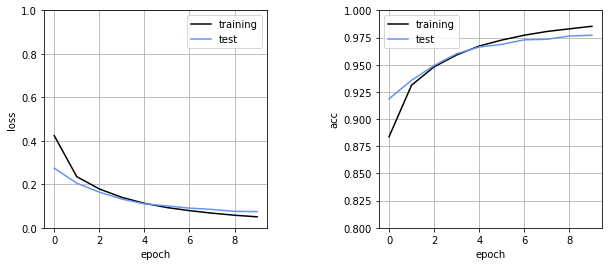

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test',
         color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='training', color='black')
plt.plot(history.history['val_acc'],label='test', color='cornflowerblue')
plt.ylim(0.8, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

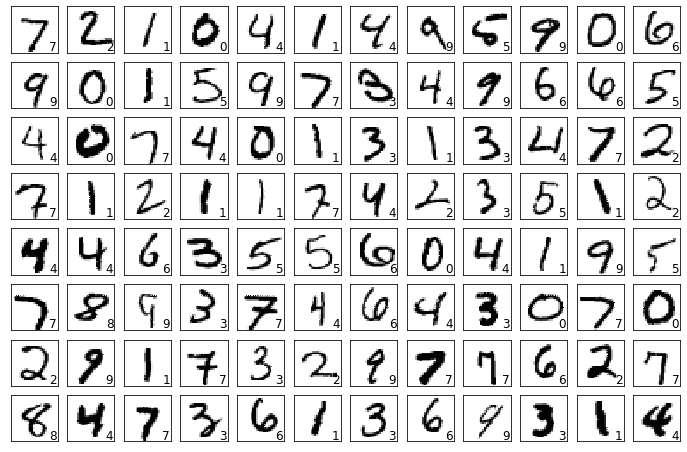

In [0]:
def show_prediction():
    n_show = 96
    y = network.predict(test_images) # (A)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = test_images[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(test_labels[i, :]):
            plt.plot([0, 27], [1, 1], color='red', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
#-- 메인
show_prediction()
plt.show()